# lista 4

In [1]:
import numpy as np, matplotlib.pyplot as plt

## zadanie 1

In [28]:
mc = 1000
n = np.linspace(1000, 10000, 10)
mi = 0
sigma = 1

In [19]:
teoretyczna = np.exp(1/2*(sigma**2 + 2*mi))
vars = []
Ys_ = {}

In [27]:
for i in range(mc):
    for k in n:
        X = np.random.normal(mi, sigma, int(k))
        Y = np.exp(X)
        y_ = 1/k * sum(Y)
        if k not in Ys_:
            Ys_[int(k)] = [y_]
        else:
            Ys_[int(k)].append(y_)
        # var = np.var(y_)


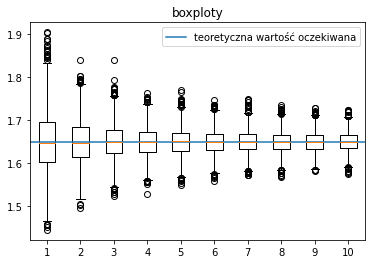

In [41]:
plt.boxplot(Ys_.values())
plt.axhline(y=teoretyczna, label = 'teoretyczna wartość oczekiwana')
plt.title('boxploty')
plt.legend()
plt.show()

In [35]:
for i in Ys_.values():
    vars.append(np.var(i))

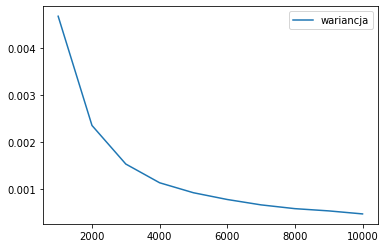

In [39]:
plt.plot(n,vars, label = 'wariancja')
plt.legend()
plt.show()

# zadanie 2

In [98]:
def F_u(u, Fx, n=1000):
    return Fx(u)**n


In [99]:
def f_u(u, Fx, fx, n=1000):
    return n*Fx(u)**(n-1)*fx(u)

### a) rozkład normalny

$\mu = 0, \sigma = 1$

In [100]:
from scipy. stats import norm, lognorm, pareto
import seaborn as sns

In [101]:
mc = 1000
mi = 0
sigma = 1
Us = []
for i in range(mc):
    X = np.random.normal(mi, sigma, 1000)
    U = max(X)
    Us.append(U)


In [102]:
def fu(u, n=1000):
    # n*norm.cdf((u - mi)/sigma)**(n-1)/(np.sqrt(2*np.pi)*sigma)*np.exp(-(u-mi)**2/(2*sigma**2))
    return n*norm.cdf(u,mi,sigma)**(n-1)*norm.pdf(u,mi,sigma)

In [103]:
def Fu(u, n=1000):
    return norm.cdf((u-mi)/sigma)**n

In [104]:
def demp(X, x):
    n = len(X)
    count = sum(1 for xi in X if xi <= x)
    return count / n
def drewdemp(X): # dystrybuanta empiryczna
    x_values = sorted(X)
    y_values = [demp(x_values, x) for x in x_values]
    plt.plot(x_values, y_values, label='empiryczna')
    plt.title('Wykres dystrybuant')
    
    plt.legend()
    plt.show()

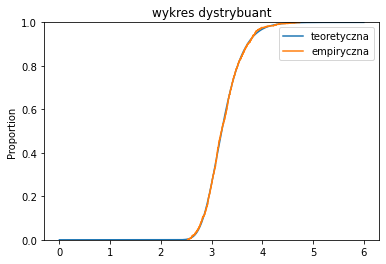

In [105]:
xs = np.linspace(0,6, 1000)
ys = sorted([Fu(x) for x in xs])
plt.plot(xs, ys, label= 'teoretyczna')
sns.ecdfplot(data = Us, label = 'empiryczna')
plt.legend()
plt.title('wykres dystrybuant')
plt.show()

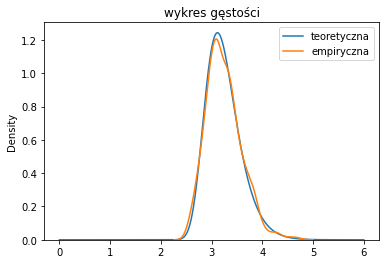

In [106]:
xs = np.linspace(0,6, 1000)
yss = [fu(x) for x in xs]
plt.plot(xs, yss, label= 'teoretyczna')
sns.kdeplot(data = Us, label = 'empiryczna')
plt.legend()
plt.title('wykres gęstości')
plt.show()

### b) rozkład log-normalny

$\mu =0, \sigma = 1$

In [107]:
mi = 0
sigma = 1

In [108]:
def fln(x):
    return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-1/2*(np.log(x)-mi)**2/sigma**2)

In [ ]:
def Fln(x):
    

In [109]:
mc = 1000
mi = 0
sigma = 1
Us2 = []
for i in range(mc):
    Y = np.random.lognormal(mi, sigma, 1000)
    U = max(Y)
    Us2.append(U)

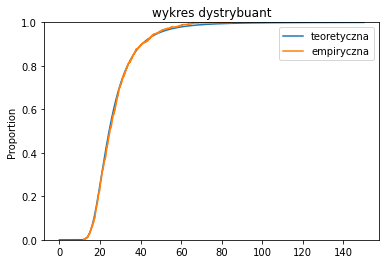

In [110]:
n=1000
xss = np.linspace(0,150, 1000)
ys = [lognorm.cdf(x,s=sigma,loc=0, scale=1)**n for x in xss]
plt.plot(xss, ys, label= 'teoretyczna')
sns.ecdfplot(data = Us2, label = 'empiryczna')
plt.legend()
plt.title('wykres dystrybuant')
plt.show()

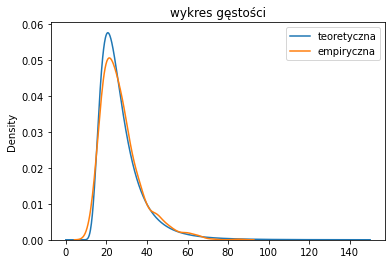

In [111]:
xss = np.linspace(0,150, 1000)
ys = [n*lognorm.cdf(x,s=sigma,loc=0, scale=1)**(n-1)*lognorm.pdf(x,s=sigma,loc=0, scale=1) for x in xss]
plt.plot(xss, ys, label= 'teoretyczna')
sns.kdeplot(data = Us2, label = 'empiryczna')
plt.legend()
plt.title('wykres gęstości')
plt.show()

### b) rozkład pareto

$\alpha =6, \lambda = 2$

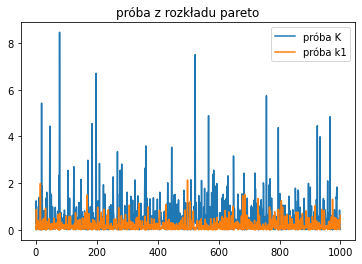

In [152]:
import random
lambd = 1
alfa = 3
us = []
n=10**3
for u in range(n):
    us.append(random.random())
def F(x,alfa=3, lambd=1):   # dystrybuanta
    return 1-(lambd/(lambd+x)**alfa)
def F_1(u, alfa = 3, lambd = 1):    # dystrybuanta odwrotna
    return lambd*(np.sqrt(1-u)**(-1/alfa)-1)
K = []
k1 = []
for u in us:
    K.append(lambd*(1/(u**(1/alfa))-1))
    k1.append(F_1(u))

In [155]:
mc = 1000
alfa = 6
lambd = 2
Us3 = []
for i in range(mc):
    Z = [lambd*(np.sqrt(1-u)**(-1/alfa)-1) for i in range(n)]
    U = max(Z)
    Us3.append(U)

In [156]:
def fp(x,a=alfa, l=lambd):
    return a*l**a/(a+x)**(a+1)

In [157]:
def Fp(x,a=alfa,l=lambd):
    return 1- (l/(x+l))**a

In [158]:
n=1000
pss = np.linspace(0,10, 1000)
pp = [Fp(x)**n for x in pss]

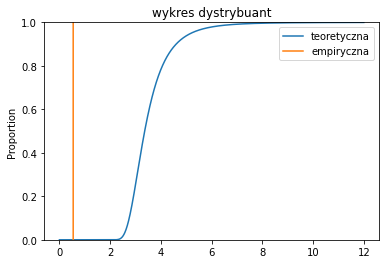

In [159]:
ysss = [pareto.cdf(x,alfa)**n for x in xss]
plt.plot(xss, ysss, label= 'teoretyczna')
sns.ecdfplot(data = Us3, label = 'empiryczna')
plt.legend()
plt.title('wykres dystrybuant')
plt.show()

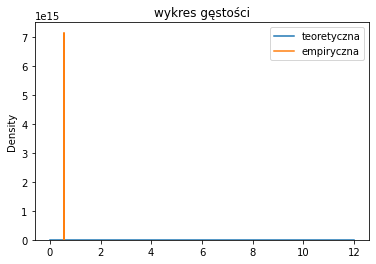

In [160]:
ppp = [n*Fp(x)**(n-1)*fp(x) for x in xss]
k = [n*pareto.cdf(x,alfa)**(n-1)*pareto.pdf(x,alfa) for x in xss]
plt.plot(xss, ppp, label= 'teoretyczna')
sns.kdeplot(data = Us3, label = 'empiryczna')
plt.legend()
plt.title('wykres gęstości')
plt.show()